<a href="https://colab.research.google.com/github/yuri-spizhovyi-mit/ET6-ML/blob/main/Session1__data_analysis/notebooks/Recitation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MIT License
#
# @title Copyright (c) 2025 Ana Trisovic { display-mode: "form" }

# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Welcome to the UAI Course on Effective Data Visualization

## Descriptive Statistics

### Quick Overview

This Recitation introduces the foundational concepts of data visualization in Python and provides hands-on experience with key techniques for exploring data trends. You'll learn how to create and customize common line plots, and bar graphs—using libraries such as `matplotlib` and `seaborn`.

Through multiple examples, the recitation emphasizes not just how to visualize data, but also how to enhance visual appeal and clarity using styles, color palettes, and layout customization. By the end, you’ll be comfortable building aesthetically pleasing and insightful charts from scratch.

## Getting Started: Software Prerequisites & Setup

### Package Requirements

In this course, we'll be working with three essential Python libraries for data visualization. These packages serve distinct and complementary purposes:

- **Pandas**: for handling and manipulating structured datasets.
- **Matplotlib**: the foundational plotting library for Python, offering fine-grained control over plots.
- **Seaborn**: built on top of Matplotlib, it provides a high-level interface for creating attractive and informative statistical graphics.

### Installation

If these packages are not already installed in your environment, you can install them using `pip`

💬 You may see a warning or version compatibility notice (especially in environments like Google Colab). As long as the core functionality works, these can typically be ignored.

In [ ]:
# !pip install seaborn pandas matplotlib

## Generation and Visualization of our Data

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We are first going to generate data that correspond to different heights of adults in the US, assuming they follow a normal distribution.

Before starting, let's remind ourselves what a normal distribution looks like.

The normal distribution is a symmetric, bell-shaped curve that describes how values are distributed around a mean. It's defined by two parameters: the mean (center) and the standard deviation (spread). Many real-world measurements — like height, test scores, or error terms — tend to follow a normal distribution, especially when influenced by many small, random factors.

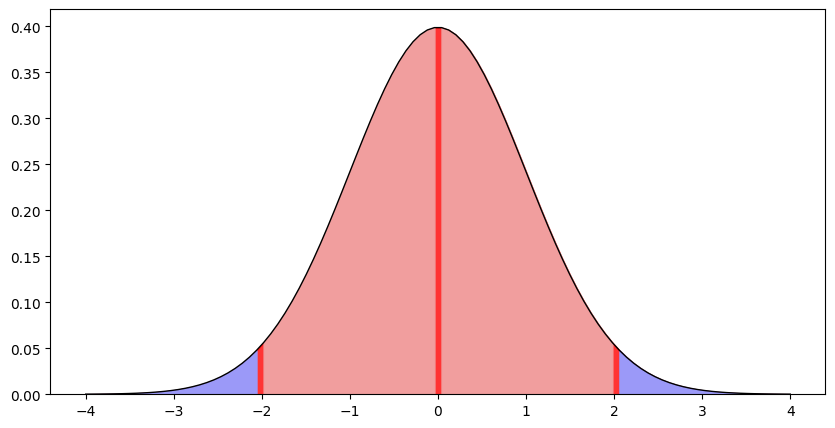

In [ ]:
# Import all libraries for this portion of the blog post
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

# Define the normal distribution
x = np.linspace(-4, 4, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
y = constant * np.exp((-x**2) / 2.0)

# Plot
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, y, color='black', linewidth=1)
ax.fill_between(x, y, color='red', alpha=0.8)

# Compute quantiles
q1, q2, q3 = np.percentile(x, [25, 50, 75])
min_val = min(x)
max_val = max(x)

# Define quantile edges
quantile_edges = [min_val, q1, q2, q3, max_val]

# Shade each quantile range
colors = ['#f19e9e', '#FED976', '#f19e9e', '#FD8D3C']  # Quartile colors

# Fill each quartile region
plt.fill_between(x, y, where=(x <= q1), color='#9b99f8',  label='0-25%')
plt.fill_between(x, y, where=(q1 < x) & (x <= q2), color='#f19e9e',  label='25-50%')
plt.fill_between(x, y, where=(q2 < x) & (x <= q3), color='#f19e9e', label='50-75%')
plt.fill_between(x, y, where=(x > q3), color='#9b99f8', label='75-100%')

ax.set_ylim(0);

We are now ready to generate our data.

(array([ 2.,  4., 11., 27., 32., 17.,  5.,  2.]),
 array([57.13492832, 59.08251269, 61.03009707, 62.97768145, 64.92526583,
        66.8728502 , 68.82043458, 70.76801896, 72.71560333]),
 <BarContainer object of 8 artists>)

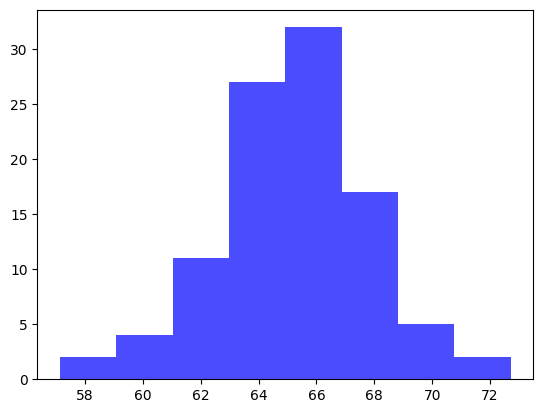

In [ ]:
average_height_inches = 65  # Average height for adults in the US is around 65 inches
std_dev_inches = 3  # A reasonable standard deviation for adult height

# Number of adults to generate heights for
num_adults = 100

# Generate the heights using a normal distribution
# set seed
np.random.seed(27)  # For reproducibility
heights_in_inches = np.random.normal(average_height_inches, std_dev_inches, num_adults)

# histogram
plt.hist(heights_in_inches, bins=8, color='blue', alpha=0.7)

We are now going to plot the heights of the individual samples that we generated.

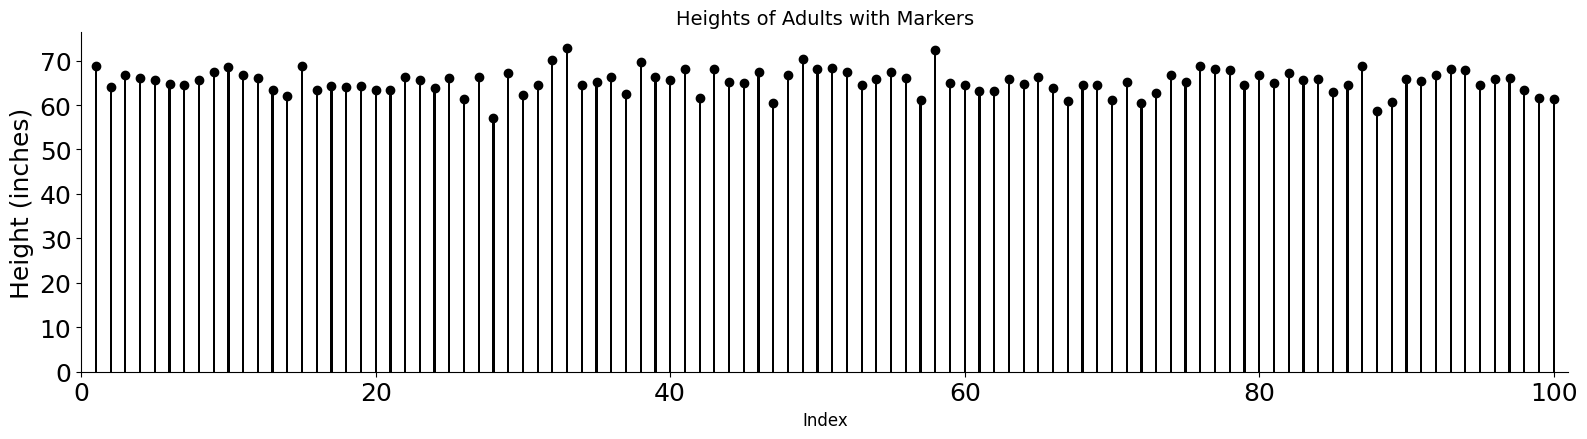

In [ ]:
figsize=(16,4.5)

# Prepare data for plotting
indices = range(1, len(heights_in_inches) + 1)  # X-axis: index
values = heights_in_inches  # Y-axis: heights in inches

# Plot thin bar chart with a circle on top
plt.figure(figsize=figsize)
plt.bar(indices, values, width=0.15, color='black', label="Height (inches)")
plt.scatter(indices, values, color='black', zorder=5, label="Top Marker")

# Add labels and title
plt.title("Heights of Adults with Markers", fontsize=14)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Height (inches)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim(0, len(heights_in_inches) + 1)
plt.tight_layout()
plt.show()

We can visualize the same data in descending order too.

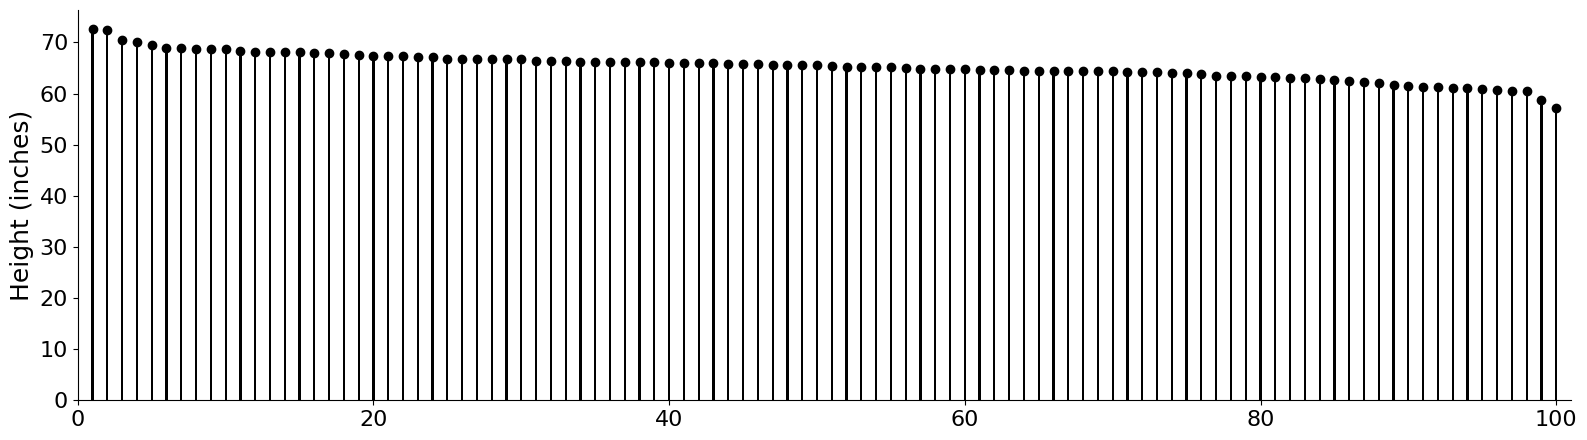

In [ ]:
# Prepare data for plotting
# sort in descending order
sorted_heights = np.sort(heights_in_inches)[::-1]  # Sort heights in descending order

# Generate indices for the x-axis
indices = np.arange(1, len(sorted_heights) + 1)

# Plot thin bar chart with a circle on top
plt.figure(figsize=figsize)
plt.bar(indices, sorted_heights, width=0.15, color='black', label="Height (inches)")
plt.scatter(indices, sorted_heights, color='black', zorder=5, label="Top Marker")

plt.ylabel("Height (inches)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim(0, len(heights_in_inches) + 1)
plt.tight_layout()
plt.show()

We are now going to count how many instances of each discrete height value were produced.

In [ ]:
# round to 2 decimal places
heights_in_inches = np.round(heights_in_inches, 1)

# Create a DataFrame for better visualization
df = pd.DataFrame({
    'Index': range(1, num_adults + 1),
    'Height': heights_in_inches
})

df['Height'].value_counts()


,count
Height,
64.5,6
65.7,3
66.1,3
66.7,3
65.6,3
...,...
65.8,1
65.5,1
67.9,1


We are now going to calculate some basic statistics of the generated heights: the **mean**, the **median** and the **mode**:

The mean is the average — we add up all the values and divide by how many there are. The median is the middle value when all the numbers are sorted in order; it separates the lower half from the upper half. The mode is the value that appears most frequently in the dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calculate mean, median, and mode
mean_height = np.mean(heights_in_inches)
median_height = np.median(heights_in_inches)
mode_height = stats.mode(heights_in_inches, keepdims=True)[0][0]  # Mode might return multiple; take the first

# Print the calculated values
print(f"Mean Height: {mean_height:.2f} inches")
print(f"Median Height: {median_height:.2f} inches")
print(f"Mode Height: {mode_height:.2f} inches")

Mean Height: 65.30 inches
Median Height: 65.55 inches
Mode Height: 64.50 inches


We can plot all the values again, in descending order, and also visualize their mean, median and mode.

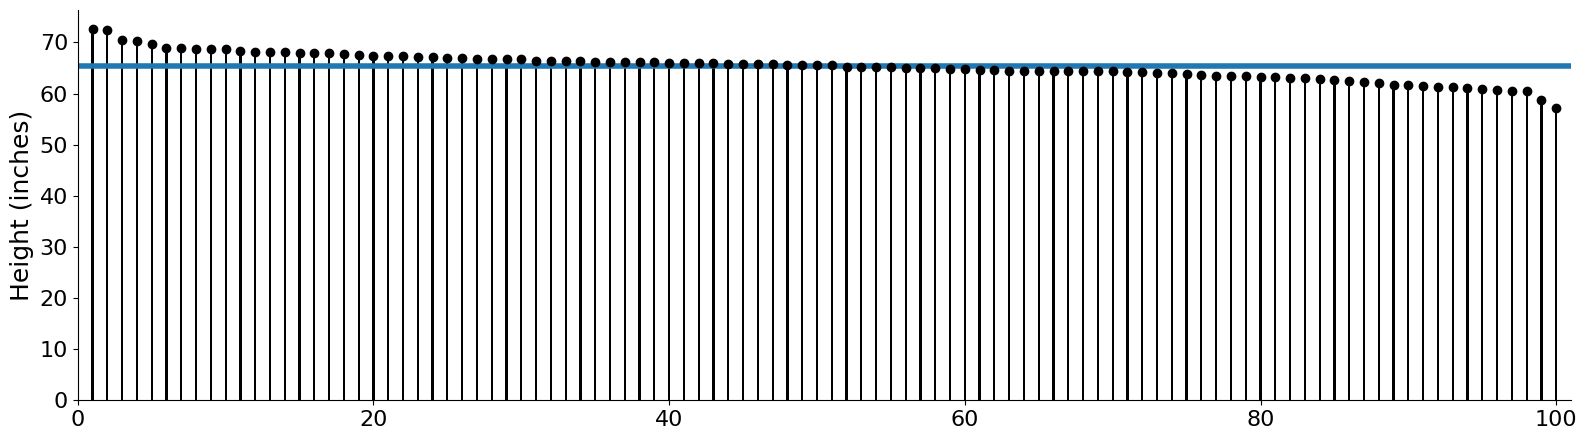

In [ ]:
# Sort heights in descending order
sorted_heights = np.sort(heights_in_inches)[::-1]
indices = np.arange(1, len(sorted_heights) + 1)

# Plot
plt.figure(figsize=figsize)
plt.bar(indices, sorted_heights, width=0.15, color='black', label="Height (inches)")
plt.scatter(indices, sorted_heights, color='black', zorder=5)

# Add horizontal lines for mean, median, mode
plt.axhline(mean_height, linestyle='-', linewidth=4, label=f"Mean: {mean_height:.2f}\"")
# plt.axhline(median_height, color='green', linestyle='-.', linewidth=2, label=f"Median: {median_height:.2f}\"")
# plt.axhline(mode_height, color='red', linestyle=':', linewidth=2, label=f"Mode: {mode_height:.2f}\"")

# Labeling
plt.ylabel("Height (inches)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Remove spines and tidy up
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim(0, len(heights_in_inches) + 1)
plt.tight_layout()
plt.show()

We can also easily visualize where the median falls in the dataset compared to the rest of the values.

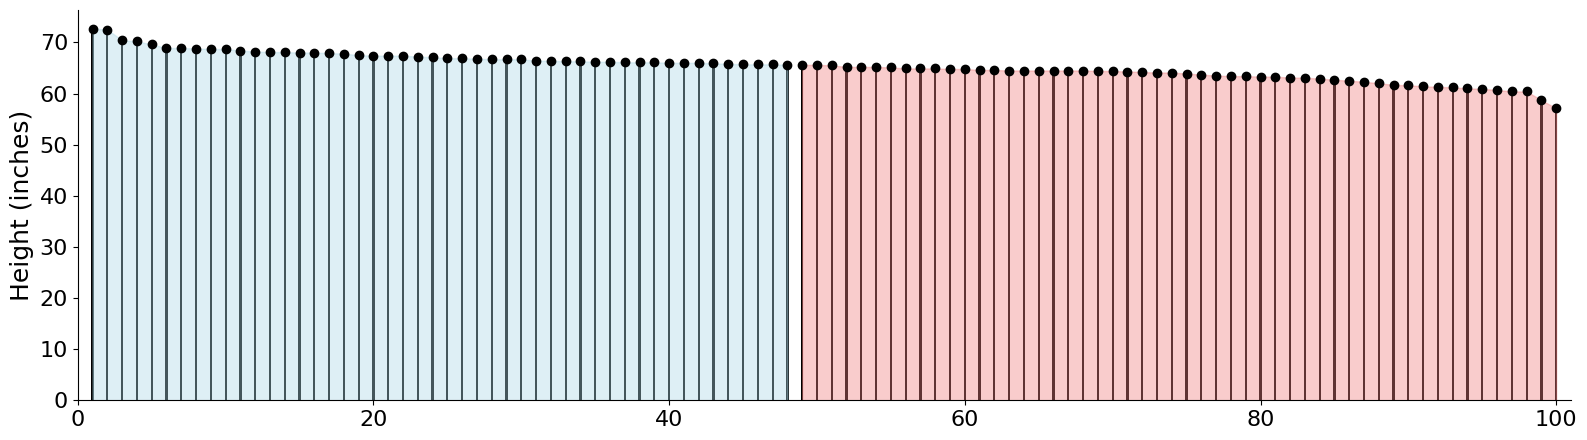

In [ ]:
# Find closest index to the median height
median_index = np.argmin(np.abs(sorted_heights - median_height)) + 1  # +1 to match indices starting from 1

# Plot
plt.figure(figsize=figsize)
plt.bar(indices, sorted_heights, width=0.15, color='black', label="Height (inches)")
plt.scatter(indices, sorted_heights, color='black', zorder=5)

# Shade left half of median
plt.fill_between(indices[:median_index], 0, sorted_heights[:median_index], color='lightblue', alpha=0.4, label='Left of Median')
# Shade right half of median
plt.fill_between(indices[median_index:], 0, sorted_heights[median_index:], color='lightcoral', alpha=0.4, label='Right of Median')

# Aesthetics
plt.ylabel("Height (inches)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim(0, len(heights_in_inches) + 1)
plt.tight_layout()
plt.show()

## Different Distribution plots

We can plot the histogram of the resulting data distribution in different ways. First, we will create a histogram-like plot with dots stacked on top of each other.

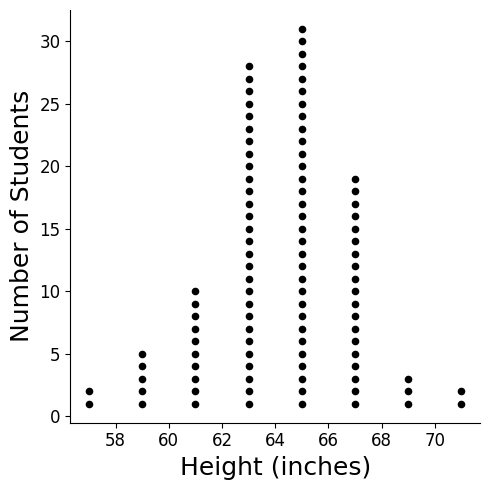

In [ ]:
# Create a histogram-like plot with dots stacked on top of each other
plt.figure(figsize=(5, 5))

# Define the bins
bins = np.arange(min(heights_in_inches), max(heights_in_inches) + 1, 2)

# Create the histogram data
hist, bin_edges = np.histogram(heights_in_inches, bins=bins)

# Plot dots for each bin
for i, count in enumerate(hist):
    bin_center = (bin_edges[i] + bin_edges[i + 1]) / 2
    for j in range(count):
        plt.scatter(bin_center-1.1, j + 1, color='black', s=20)

# Add labels and title

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Height (inches)", fontsize=18)
plt.ylabel("Number of Students", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


We are now going to plot the typical histogram.

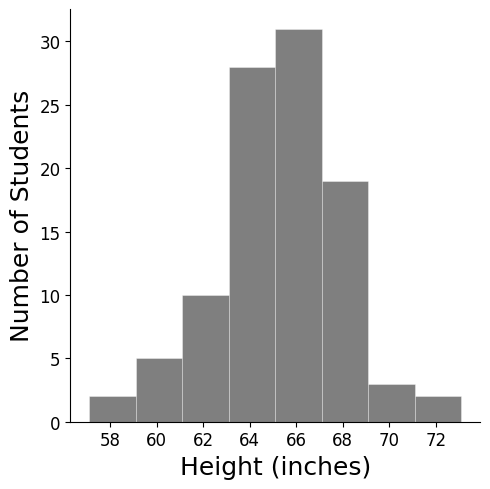

In [ ]:
# Create a histogram plot
plt.figure(figsize=(5, 5))

# Define the bins
bins = np.arange(min(heights_in_inches), max(heights_in_inches) + 1, 2)

# Plot the histogram
plt.hist(heights_in_inches, bins=bins, color='black', alpha=0.5, edgecolor='white', linewidth=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Height (inches)", fontsize=18)
plt.ylabel("Number of Students", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


The histogram visualization changes when we change the number of bins we want to use.

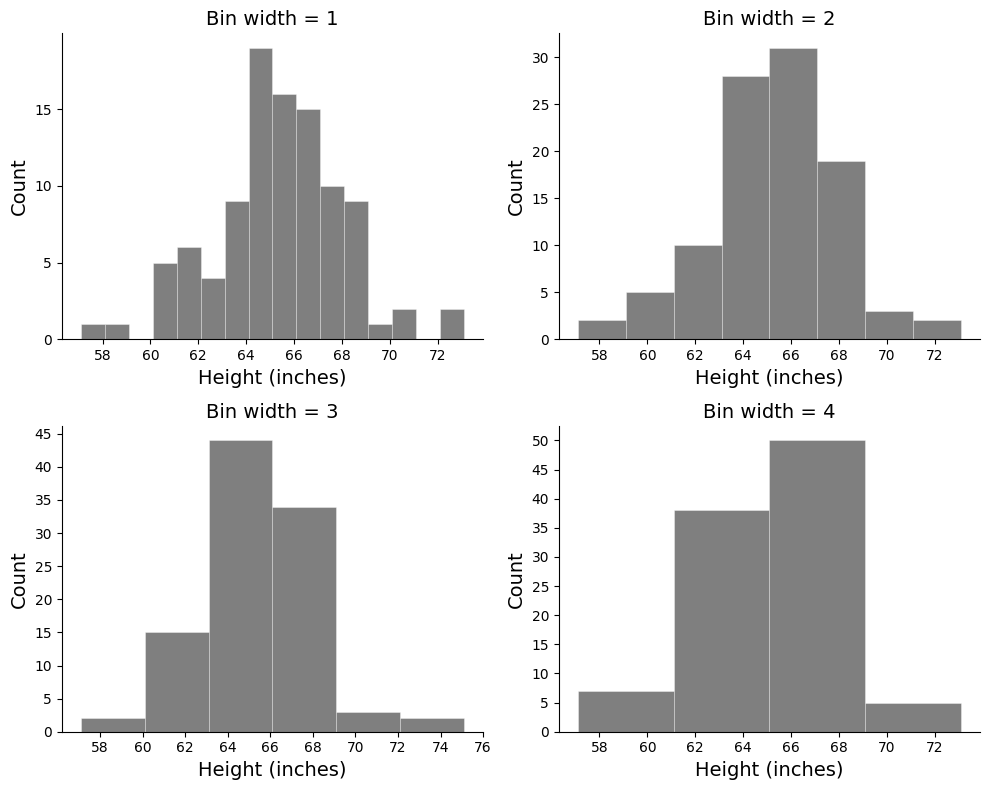

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Define different bin step sizes to control histogram granularity
bin_steps = [1, 2, 3, 4]  # coarser to finer
titles = ["Bin width = 1","Bin width = 2","Bin width = 3","Bin width = 4"]

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

# Plot each histogram
for i, step in enumerate(bin_steps):
    bins = np.arange(min(heights_in_inches), max(heights_in_inches) + step, step)

    axs[i].hist(heights_in_inches, bins=bins, color='black', alpha=0.5,
                edgecolor='white', linewidth=0.5)

    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_title(titles[i], fontsize=14)
    axs[i].set_xlabel("Height (inches)", fontsize=14)
    axs[i].set_ylabel("Count", fontsize=14)
    axs[i].tick_params(axis='both', labelsize=10)

    # Force integer ticks
    axs[i].xaxis.set_major_locator(MultipleLocator(2))  # adjust if x range is too wide
    axs[i].yaxis.set_major_locator(MultipleLocator(5))


plt.tight_layout()
plt.show()

We are now going to create a density plot. The KDE (Kernel Density Estimate) shows where values are concentrated — like a smoothed version of a histogram — helping us understand the shape of the distribution (e.g., symmetric, skewed, multimodal). This is plotted easily using the seaborn package.

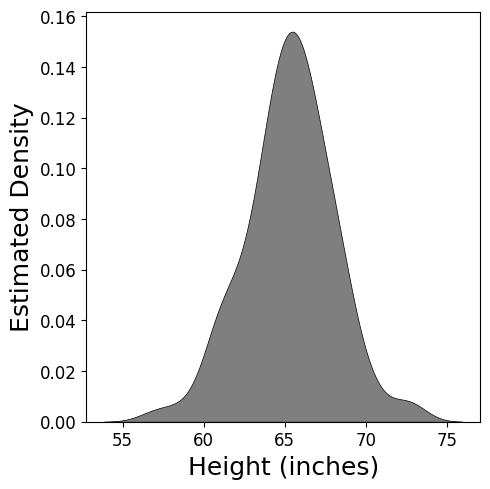

In [ ]:
# Create a density plot
plt.figure(figsize=(5, 5))

# plot kde
sns.kdeplot(heights_in_inches, color='black', fill=True, alpha=0.5, linewidth=0.5)

plt.xlabel("Height (inches)", fontsize=18)
plt.ylabel("Estimated Density", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


We can add more information about the distribution in this plot, by including percentiles.

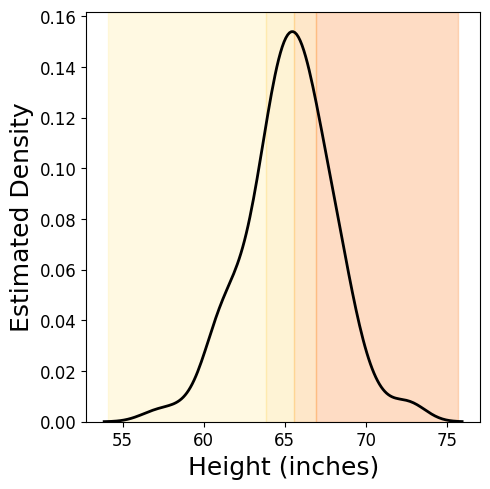

In [ ]:
plt.figure(figsize=(5, 5))

# Plot KDE
sns.kdeplot(heights_in_inches, color='black', fill=False, alpha=1, linewidth=2)

# Compute quantiles
q1, q2, q3 = np.percentile(heights_in_inches, [25, 50, 75])
min_val = min(heights_in_inches)-3
max_val = max(heights_in_inches)+3

# Define quantile edges
quantile_edges = [min_val, q1, q2, q3, max_val]

# Shade each quantile range
colors = ['#FFEDA0', '#FED976', '#FEB24C', '#FD8D3C']  # Quartile colors
for i in range(4):
    plt.axvspan(quantile_edges[i], quantile_edges[i+1], color=colors[i], alpha=0.3)

# Aesthetics
plt.xlabel("Height (inches)", fontsize=18)
plt.ylabel("Estimated Density", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Box plot

Another way to visualize the distribution is by creating a box plot. A box plot (or box-and-whisker plot) is a statistical chart that summarizes the distribution of a dataset using just a few key numbers.

It shows:

- The median (middle value)

- The interquartile range (IQR) — the box spans from the 25th percentile (Q1) to the 75th percentile (Q3). IQR is calculated as Q3 - Q1.

- The whiskers - the lines that extend from the box in a box plot. They show the range of the data, excluding outliers. By default (in most plotting libraries like Seaborn or matplotlib):

The lower whisker extends from the 25th percentile (Q1) down to the smallest value that is within 1.5 × IQR below Q1.

The upper whisker extends from the 75th percentile (Q3) up to the largest value that is within 1.5 × IQR above Q3.

- Any data points beyond these limits are considered outliers and shown as individual dots.

Box plots give a quick overview of:

- Center (via the median)

- Spread (via the IQR)

- Skewness (based on box and whisker asymmetry)

- Outliers (shown as individual points)

They're especially helpful when comparing distributions across multiple groups side by side.



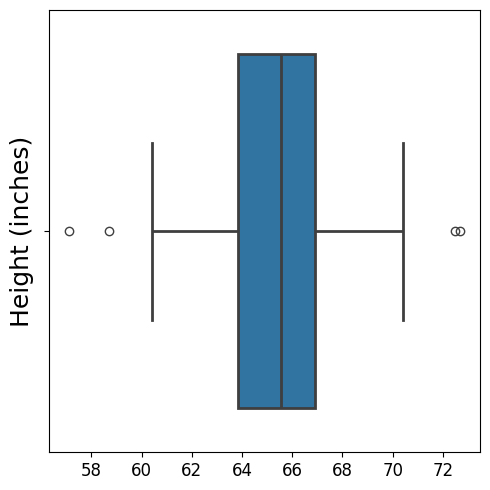

In [ ]:
# Create a box plot
plt.figure(figsize=(5, 5))

# plot box plot
sns.boxplot(x=heights_in_inches, linewidth=2)
plt.ylabel("Height (inches)", fontsize=18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


What is the effect of outliers in the distribution?

Right now, we don't have any big outliers. We can display the mean and the median and notice that their values are very close.

In [ ]:
mean_height = np.mean(heights_in_inches)
mean_height

np.float64(65.30000000000001)

In [ ]:
median_height = np.median(heights_in_inches)
median_height

np.float64(65.55)

What happens if we add a big outlier?

In [ ]:
heights_in_inches = np.append(heights_in_inches, 130784)
length = len(heights_in_inches)

In [ ]:
np.mean(heights_in_inches)

np.float64(1359.5445544554455)

In [ ]:
median_height = np.median(heights_in_inches)
median_height

np.float64(65.6)

A single outlier can completely change the mean value of the distribution. The median is not affected by the shift.

## Comparisons between populations

We are now going to generate samples with height values for 100 people, where we assume a mix of males and females. To generate samples for females, we are using a slightly different mean for our normal distribution (65 inches vs 70 for men). After generating the distributions, we are storing them, along with the gender information, in a dataframe.

In [ ]:
np.random.seed(42)

# Generate synthetic heights for 100 people
# Let's assume a mix of male and female height distributions
n_samples = 100
genders = np.random.choice(['Male', 'Female'], size=n_samples)

# Generate heights: typically, males are slightly taller on average
heights_in_inches = np.where(
    genders == 'Male',
    np.random.normal(loc=70, scale=3, size=n_samples),  # average male height ~70 in
    np.random.normal(loc=65, scale=3, size=n_samples)   # average female height ~65 in
)

# Round heights to 1 decimal place
heights_in_inches = np.round(heights_in_inches, 1)

# Create DataFrame
df = pd.DataFrame({
    'Height (inches)': heights_in_inches,
    'Gender': genders
})

Next, we are going to generate a violin plot. A violin plot is a data visualization that shows the distribution of a numerical variable across different categories — combining features of a boxplot and a KDE (kernel density estimate).

Like a boxplot, it displays the median, interquartile range, and potential outliers, but it also includes a mirrored density curve on each side, which shows the shape of the distribution.

This makes violin plots especially useful when:

- You want to compare multiple groups

- You care about both summary statistics and distribution shape

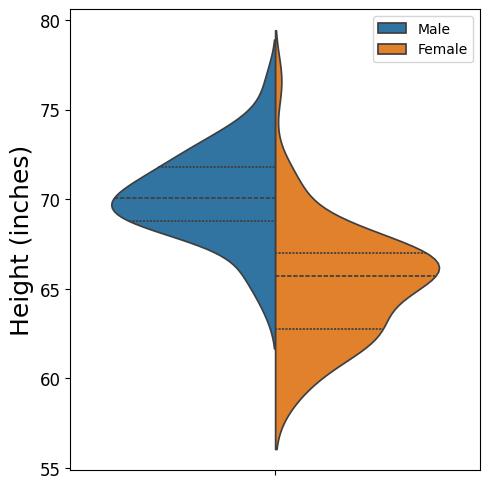

In [ ]:
# Create a violin plot
plt.figure(figsize=(5, 5))

sns.violinplot(data=df,  y="Height (inches)", hue="Gender", split=True, inner="quart")

plt.ylabel("Height (inches)", fontsize=18)
plt.legend(title="")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

We observe, as expected by our data generation process, that females' heights are concentrated around smaller values. Generally, if a violin plot is wider at the bottom than the top, that means more values are concentrated at lower levels of the variable in that group.

## Different types of distributions used to generate data

Up to this point, we have only generated data that is symmetric around a mean value, using a normal distribution. How do skewed distributions look like?

In order to visualize skewed distributions, we are going to generate data using an exponential distribution.



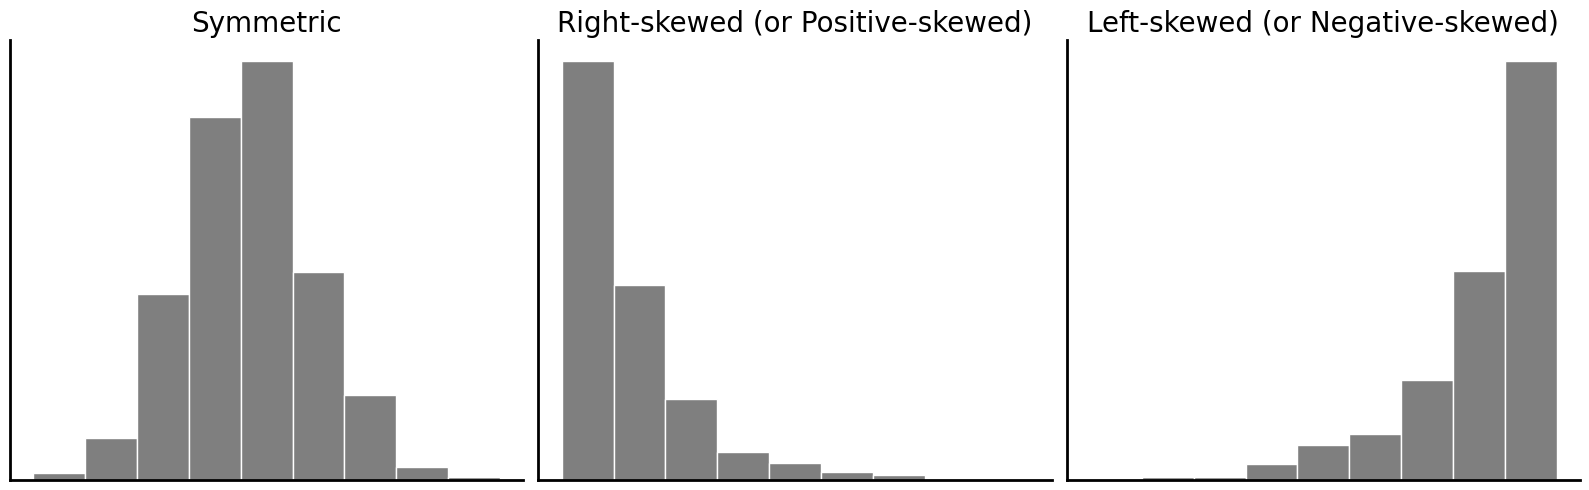

In [ ]:
from scipy import stats
# Generate data
np.random.seed(42)
symmetric_data = np.random.normal(loc=0, scale=1, size=1000)
right_skewed_data = np.random.exponential(scale=1, size=1000)
left_skewed_data = -np.random.exponential(scale=1, size=1000)

# Recreate the plot using corrected mode computation
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plotting details
distributions = [
    ("Symmetric", symmetric_data, axes[0]),
    ("Right-skewed (or Positive-skewed)", right_skewed_data, axes[1]),
    ("Left-skewed (or Negative-skewed)", left_skewed_data, axes[2])
]

for title, data, ax in distributions:
    sns.histplot(data, bins=9, kde=False, color="black", alpha=.5, edgecolor='white', ax=ax)

    ax.tick_params(axis='both', labelsize=12)
    ax.set_xlabel("", fontsize=14)
    ax.set_ylabel("", fontsize=14)
    ax.set_title(title, fontsize=20)

    # hide ticks
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

plt.tight_layout()
plt.show()

For a right-skewed distribution, most of the data is concentrated on the lower end, with a long tail of larger values extending to the right. For a left-skewed distribution, the opposite is true; there is a long tail of smaller variables that extends to the left.

How do normal distributions with different standard deviation look like? We are going to generate data from a normal distribution but different standard deviation values and visualize them.

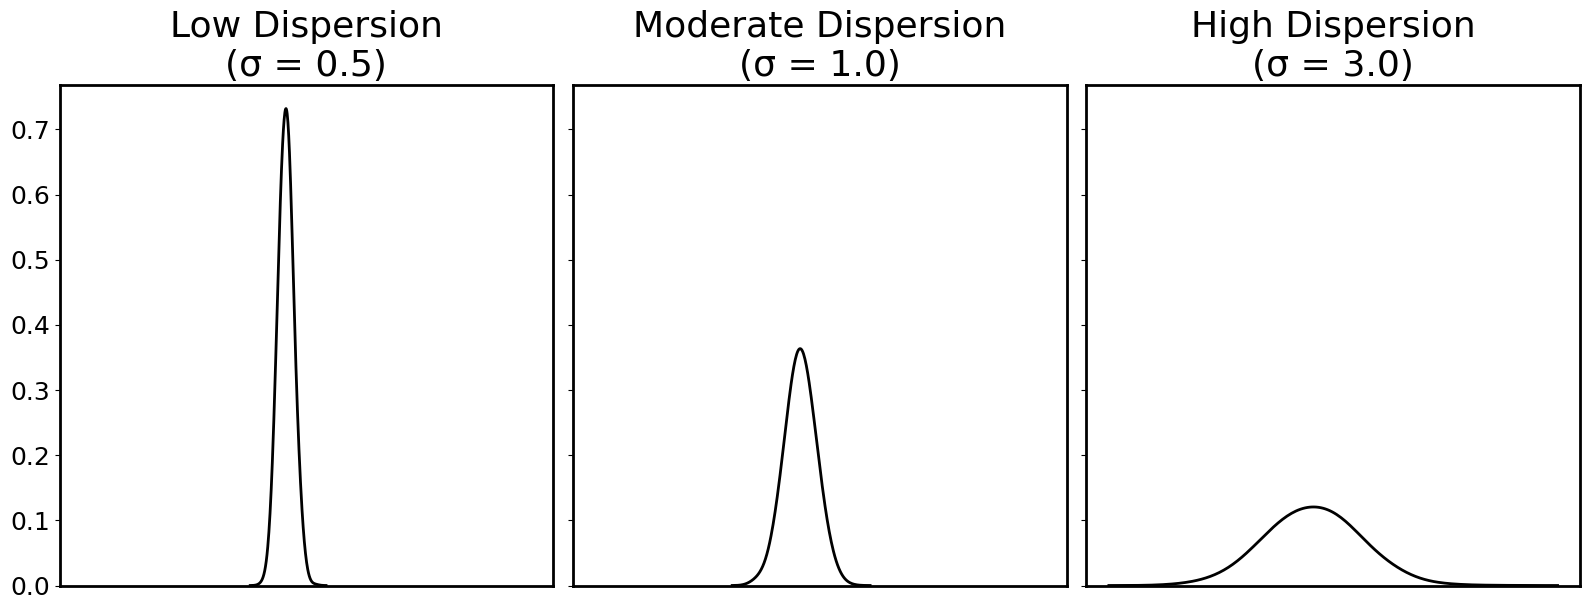

In [ ]:
# Generate data with different standard deviations
np.random.seed(42)
low_spread = np.random.normal(loc=0, scale=0.5, size=1000)
medium_spread = np.random.normal(loc=0, scale=1, size=1000)
high_spread = np.random.normal(loc=0, scale=3, size=1000)

# Recreate the plot with KDE and spread comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 6.2),  sharex=True, sharey=True)

# Plotting details
distributions = [
    ("Low Dispersion\n(σ = 0.5)", low_spread, axes[0]),
    ("Moderate Dispersion\n(σ = 1.0)", medium_spread, axes[1]),
    ("High Dispersion\n(σ = 3.0)", high_spread, axes[2])
]

for title, data, ax in distributions:
    sns.kdeplot(data, color="black", ax=ax, linewidth=2, bw_method=0.5)

    ax.set_xlabel("", fontsize=14)
    ax.set_ylabel("", fontsize=14)
    ax.set_title(title, fontsize=26)

    # hide ticks
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='both', labelsize=18)

    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)

plt.tight_layout()
plt.show()

## Association between different variables

In this part, we are going to explore how associations between different variables of the dataset look like.

First, let's generate height and weight values for a set of 10 students. We are first generating random height values in the range [58,70] and then we are creating the corresponding weights by using a linear relationship, plus noise (realistic variation (±5 lbs) to reflect natural differences not explained by height alone).

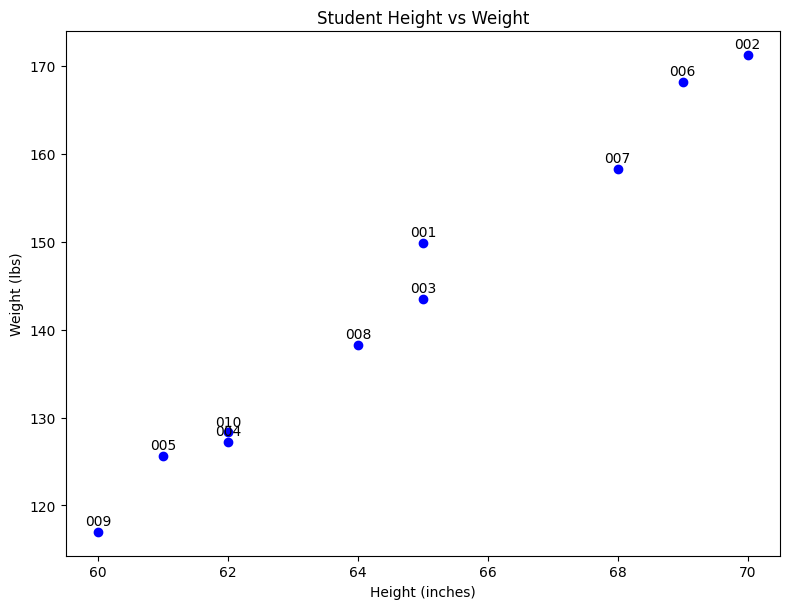

In [ ]:
import random
# Generate synthetic data for 10 students
student_ids = [f'{i:03d}' for i in range(1, 11)]
names = [f"Student {i}" for i in range(1, 11)]
heights = [random.randint(58, 70) for _ in range(10)]  # heights in inches
weights = [round((height - 58) * 5 + random.uniform(-5, 5) + 110, 1) for height in heights]  # weights in lbs

# Plotting
plt.figure(figsize=(8, 6.2))
plt.scatter(heights, weights, color='blue')
plt.title('Student Height vs Weight')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')

# Annotate each point with student ID
for i in range(10):
    plt.annotate(student_ids[i], (heights[i], weights[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.tight_layout()
plt.show()

As expected, the points seem to have a linear relationship, but they don't completely lie on a line. This is due to the variation we added when we generated the weights.

Now, we are going to explore how to characterize different associations between variables, based on their plots. To visualize these, we are going to generate artificial data in a similar way as before.


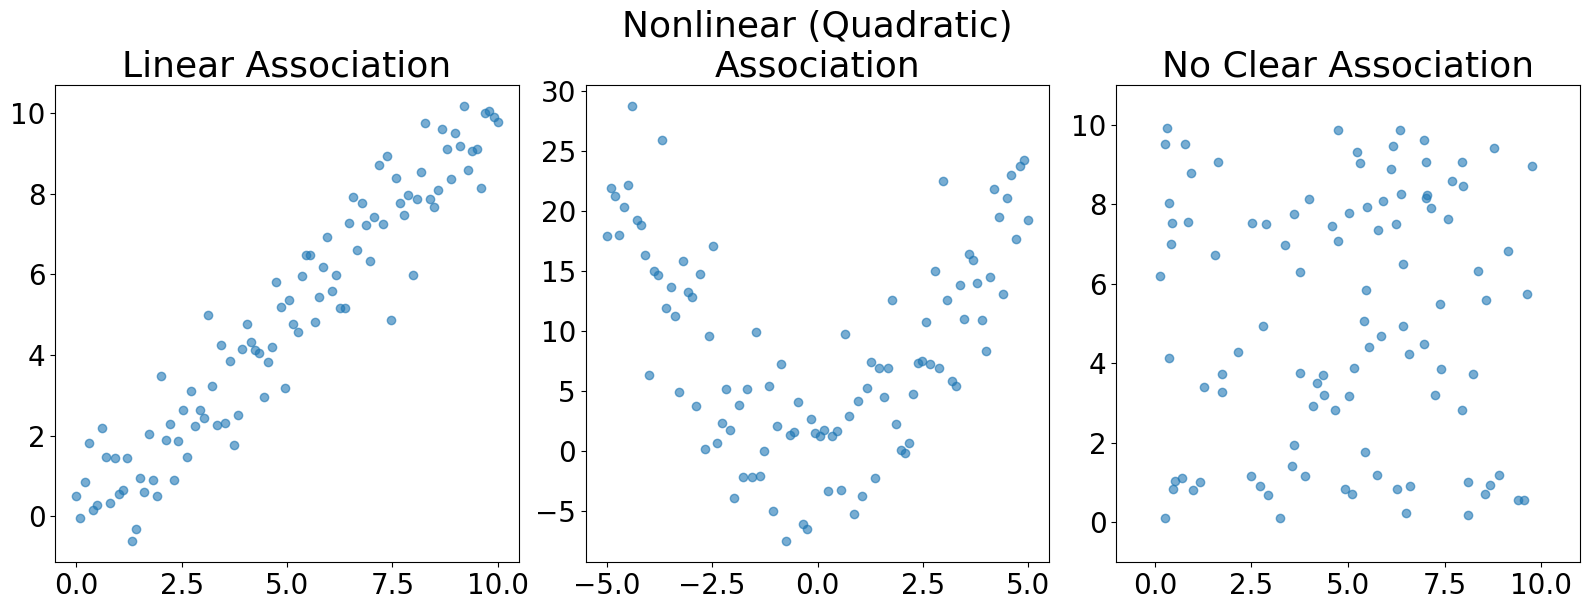

In [ ]:
# Create synthetic datasets
np.random.seed(42)
x_linear = np.linspace(0, 10, 100)
y_linear = x_linear + np.random.normal(0, 1, size=x_linear.shape)

x_quadratic = np.linspace(-5, 5, 100)
y_quadratic = x_quadratic**2 + np.random.normal(0, 5, size=x_quadratic.shape)

x_random = np.random.rand(100) * 10
y_random = np.random.rand(100) * 10

# Setup figure and axes
fig, axes = plt.subplots(1, 3, figsize=(16, 6.2))

datasets = [
    (x_linear, y_linear, "Linear Association", 'Blues'),
    (x_quadratic, y_quadratic, "Nonlinear (Quadratic)\nAssociation", 'Greens'),
    (x_random, y_random, "No Clear Association", 'Reds'),
]

# Loop through axes and apply plots and spine styling
for ax, (x, y, title, cmap) in zip(axes, datasets):
    ax.scatter(x, y, alpha=0.6)
    ax.set_title(title, fontsize=26)

    # Set tick size
    ax.tick_params(axis='both', labelsize=20)

axes[2].set_xlim(-1, 11)
axes[2].set_ylim(-1, 11)

plt.tight_layout()
plt.show()

We can also observe whether the variables have a positive or a negative correlation. A positive correlation means that as one variable increases, the other variable also tends to increase. A negative correlation means that as one variable increases, the other decreases.

The sns.regplot function is used to visualize the relationship between two numerical variables, and to fit and display a linear regression model over the scatter plot.

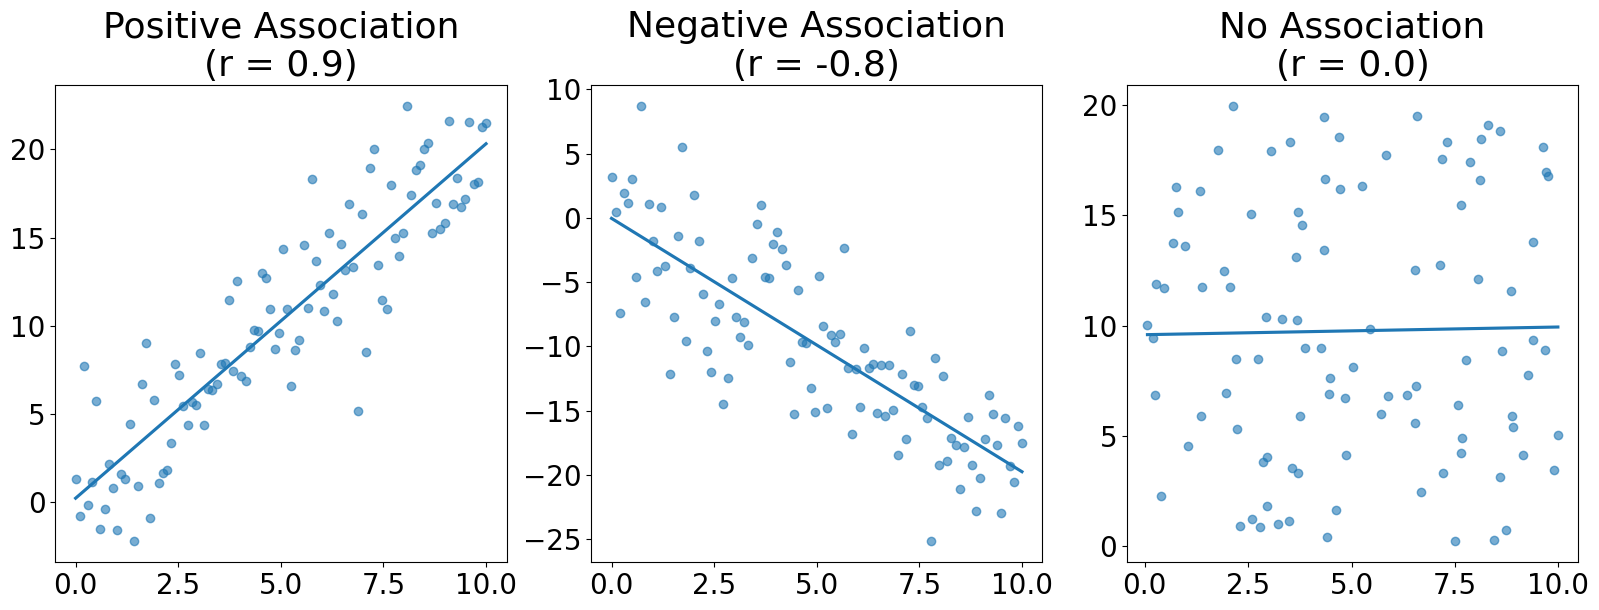

In [ ]:
from scipy.stats import pearsonr

# Generate data
np.random.seed(5)
x = np.linspace(0, 10, 100)

# Positive association
y_pos = 2 * x + np.random.normal(0, 3, size=100)

# Negative association
y_neg = -2 * x + np.random.normal(0, 4, size=100)

# No association
y_none = np.random.rand(100) * 10
x_none = np.random.rand(100) * 20

# Compute correlation coefficients
r_pos, _ = pearsonr(x, y_pos)
r_neg, _ = pearsonr(x, y_neg)
r_none, _ = pearsonr(x_none, y_none)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 6.2))

# Plot definitions
plot_data = [
    (x, y_pos, f"Positive Association\n(r = {r_pos:.1f})"),
    (x, y_neg, f"Negative Association\n(r = {r_neg:.1f})"),
    (y_none, x_none, f"No Association\n(r = {r_none:.1f})")
]

# Loop through each subplot
for ax, (x_val, y_val, title) in zip(axes, plot_data):
    sns.regplot(x=x_val, y=y_val, ax=ax, ci=None,
        scatter_kws={'alpha': 0.6})
    ax.set_title(title, fontsize=26)

    # Set tick size
    ax.tick_params(axis='both', labelsize=20)

plt.tight_layout()
plt.show()

Apart from identifying the type of association (positive or negative), we can also assess how strong the relationship is.

If the data points are tightly clustered around the trend line, the relationship is strong.
If the points are more spread out, the association is weaker — meaning the variables are less consistently related.



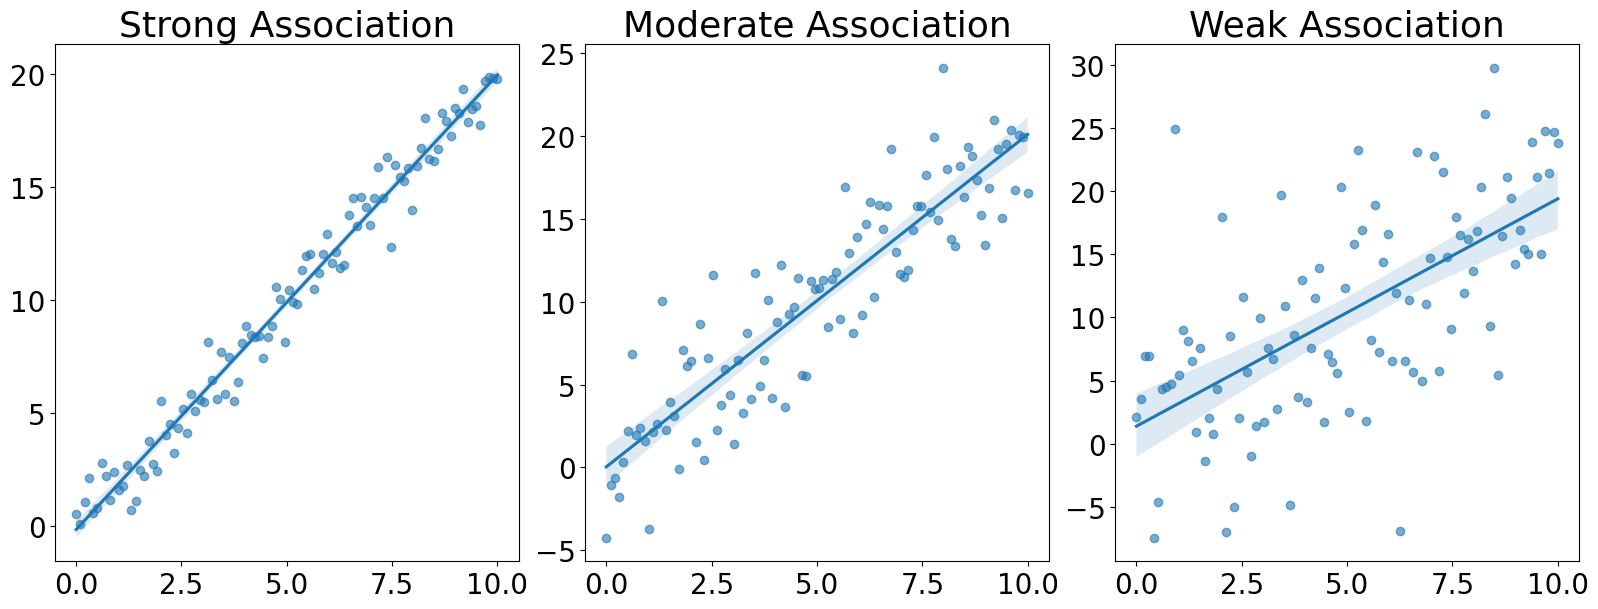

In [ ]:
# Generate base data
np.random.seed(42)
x = np.linspace(0, 10, 100)

# Different noise levels to simulate different strengths
y_strong = 2 * x + np.random.normal(0, 1, size=100)    # Strong
y_moderate = 2 * x + np.random.normal(0, 3, size=100)  # Moderate
y_weak = 2 * x + np.random.normal(0, 6, size=100)      # Weak

# Setup plots
fig, axes = plt.subplots(1, 3, figsize=(16, 6.2))

# Data for plotting
data = [
    (x, y_strong, "Strong Association"),
    (x, y_moderate, "Moderate Association"),
    (x, y_weak, "Weak Association")
]

# Loop to plot each association strength
for ax, (x_val, y_val, title) in zip(axes, data):
    sns.regplot(x=x_val, y=y_val, ax=ax, scatter_kws={'alpha': 0.6},
    )
    ax.set_title(title, fontsize=26)

    # Set tick size
    ax.tick_params(axis='both', labelsize=20)
plt.tight_layout()
plt.show()

# Simpson's Paradox

Simpson's Paradox is a statistical phenomenon where a trend that appears in several groups of data reverses or disappears when the groups are combined. It reminds us to always consider group structure before drawing conclusions.

We are going to visualize an example using a synthetic dataset of males and females. Suppose that we are focusing on basketball, and that we have male and female players that score points.

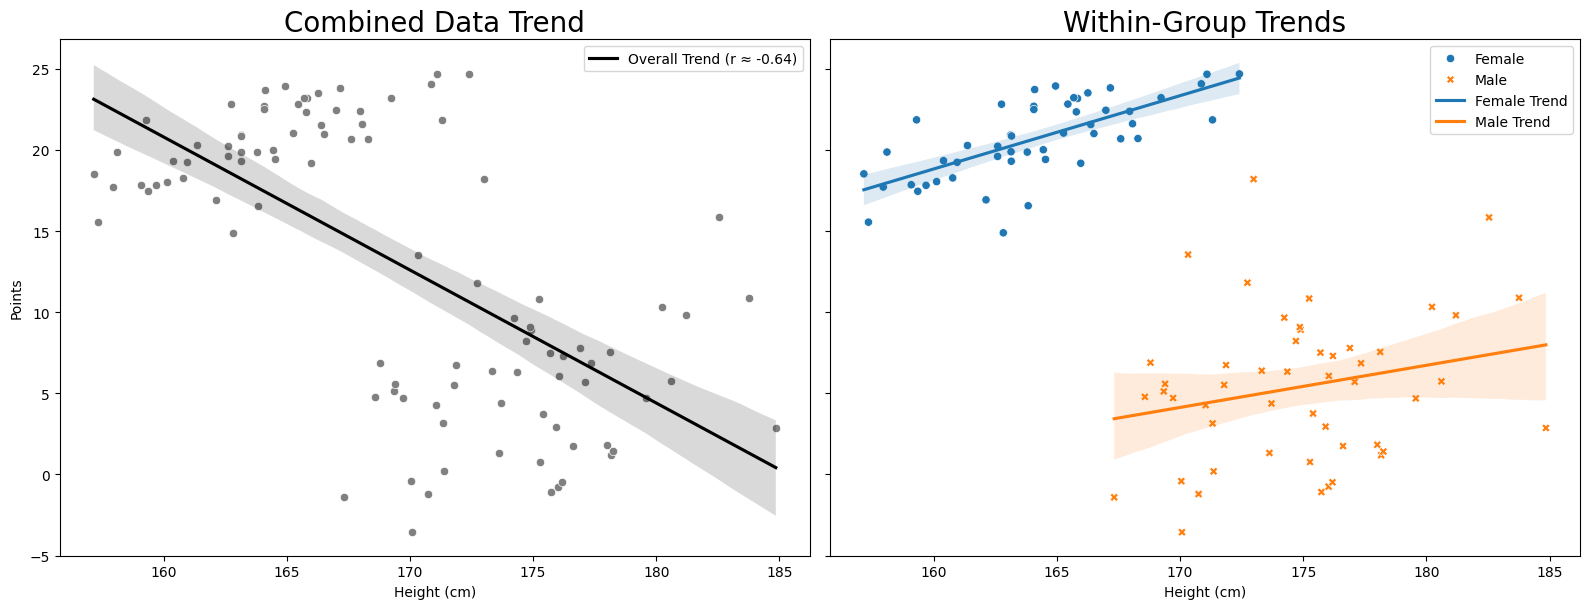

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data for females
n_females = 50
# Generate data for males
n_males = 50

# Keep female group as is
female_heights = np.random.normal(loc=165, scale=4, size=n_females)
female_points = 0.4 * female_heights - 45 + np.random.normal(0, 2, size=n_females)

# Adjust male group: taller heights, but points with shallower slope and higher noise
male_heights = np.random.normal(loc=175, scale=4, size=n_males)
male_points = 0.2 * male_heights - 30 + np.random.normal(0, 5, size=n_males)  # More noise, less slope

# Combine new data
df_zero_corr = pd.DataFrame({
    "Height": np.concatenate([female_heights, male_heights]),
    "Points": np.concatenate([female_points, male_points]),
    "Gender": ["Female"] * n_females + ["Male"] * n_males
})

# Calculate correlations
overall_corr, _ = pearsonr(df_zero_corr["Height"], df_zero_corr["Points"])
female_corr, _ = pearsonr(df_zero_corr[df_zero_corr["Gender"] == "Female"]["Height"], df_zero_corr[df_zero_corr["Gender"] == "Female"]["Points"])
male_corr, _ = pearsonr(df_zero_corr[df_zero_corr["Gender"] == "Male"]["Height"], df_zero_corr[df_zero_corr["Gender"] == "Male"]["Points"])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6.2), sharex=True, sharey=True)

# Combined plot
sns.scatterplot(data=df_zero_corr, x="Height", y="Points", color='gray', ax=axes[0])
sns.regplot(data=df_zero_corr, x="Height", y="Points", scatter=False, color='black',
    label=f'Overall Trend (r ≈ {overall_corr:.2f})', ax=axes[0])
axes[0].set_title("Combined Data Trend", fontsize=20)
axes[0].set_xlabel("Height (cm)")
axes[0].legend()

# Subgroup plot
sns.scatterplot(data=df_zero_corr, x="Height", y="Points", hue="Gender", style="Gender", ax=axes[1])
sns.regplot(data=df_zero_corr[df_zero_corr["Gender"] == "Female"], x="Height", y="Points",
    scatter=False, label='Female Trend', color='tab:blue', ax=axes[1])
sns.regplot(data=df_zero_corr[df_zero_corr["Gender"] == "Male"], x="Height", y="Points",
scatter=False, label='Male Trend', color='tab:orange', ax=axes[1])
axes[1].set_title("Within-Group Trends", fontsize=20)
axes[1].set_xlabel("Height (cm)")
axes[1].legend()

plt.tight_layout()
plt.show()


- **Left Plot - Combined Data Trend**

There's a strong negative correlation (r ≈ -0.64) between height and points when looking at the full dataset.

It suggests that taller people tend to score fewer points, which feels counterintuitive.

- **Right Plot - Within-Group Trends**
When the data is separated by gender:

Both female and male subgroups show a positive correlation between height and points.

That is, within each group, taller individuals score more, not less.



## Key Takeaways

 - Visualizing distributions with histograms, KDEs, box plots, and violin plots helps reveal shape, spread, and outliers.

 - Skewness tells us if data is lopsided — right-skewed has a long tail to the right, left-skewed to the left.

 - Correlation shows how two variables move together — positive, negative, or none — and how strong that relationship is.

 - Simpson’s Paradox warns us that trends in combined data can reverse when we look at subgroups.

 - Good visualization choices make patterns and relationships easier to understand and interpret.